#  Importing necessary libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#Defining color quantization function

In [4]:
def color_quantization(img, k):
  data = np.float32(img).reshape((-1, 3))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  final = center[label.flatten()]
  final = final.reshape(img.shape)
  return result


#Combining everything

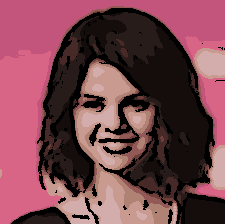

True

In [ ]:
img = cv2.imread('/content/11.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_1 = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray_1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 5)
color = cv2.bilateralFilter(img, 9, 200,200)
color=  color_quantization(color, 10)
cartoon = cv2.bitwise_and(color, color, mask=edges)
cv2_imshow(cartoon)
# img_path='/content'+uploaded.keys()+'cartoon'
cv2.imwrite('/content/11_cartoon.jpg',cartoon)